In [110]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data

In [111]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name= 'E Comm')
df_cleaned = df.copy()

df_cleaned

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [112]:
df_cleaned.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [113]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [114]:
df_cleaned['PreferredPaymentMode'] = df_cleaned['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df_cleaned['PreferredPaymentMode'] = df_cleaned['PreferredPaymentMode'].replace('CC', 'Credit Card')
df_cleaned['PreferredLoginDevice'] = df_cleaned['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df_cleaned['PreferedOrderCat'] = df_cleaned['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [115]:
df_cleaned[['Tenure', 'OrderCount', 'CashbackAmount']].describe()

,Tenure,OrderCount,CashbackAmount
count,5366.000000,5372.000000,5630.000000
mean,10.189899,3.008004,177.223030
std,8.557241,2.939680,49.207036
min,0.000000,1.000000,0.000000
25%,2.000000,1.000000,145.770000
50%,9.000000,2.000000,163.280000
75%,16.000000,3.000000,196.392500
max,61.000000,16.000000,324.990000


In [116]:
df_cleaned.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [117]:
missing_summary = df_cleaned.isnull().sum().to_frame('missing_count')
missing_summary['missing_pct'] = (missing_summary['missing_count'] / len(df_cleaned)) * 100
missing_summary[missing_summary['missing_count'] > 0].sort_values('missing_pct', ascending=False)

,missing_count,missing_pct
DaySinceLastOrder,307,5.452931
OrderAmountHikeFromlastYear,265,4.706927
Tenure,264,4.689165
OrderCount,258,4.582593
CouponUsed,256,4.547069
HourSpendOnApp,255,4.529307
WarehouseToHome,251,4.458259


In [118]:
df_cleaned['Churn'].value_counts(normalize=True)*100

Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64

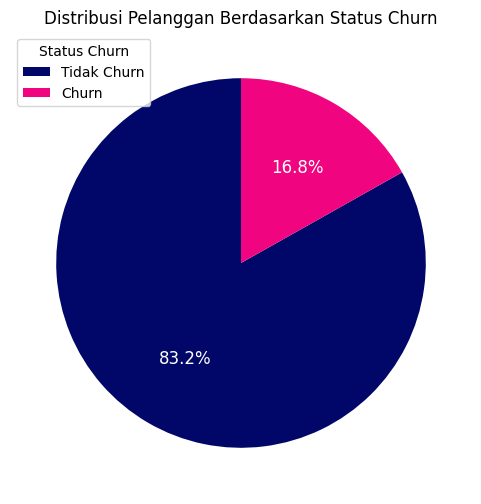

In [119]:
churn_percen = df_cleaned['Churn'].value_counts(normalize=True)*100

# Visualisasi persentase churn menggunakan pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_percen,
    labels=['Tidak Churn', 'Churn'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#010768', '#f00480'],
    textprops={'color': 'white', 'fontsize': 12}
)

# Menampilkan legend
plt.legend(
    labels=['Tidak Churn', 'Churn'],
    loc='best',  # Posisi legend otomatis
    title='Status Churn' # Judul legend
)
plt.title('Distribusi Pelanggan Berdasarkan Status Churn')
plt.show()

# Cleansing Data

<Axes: >

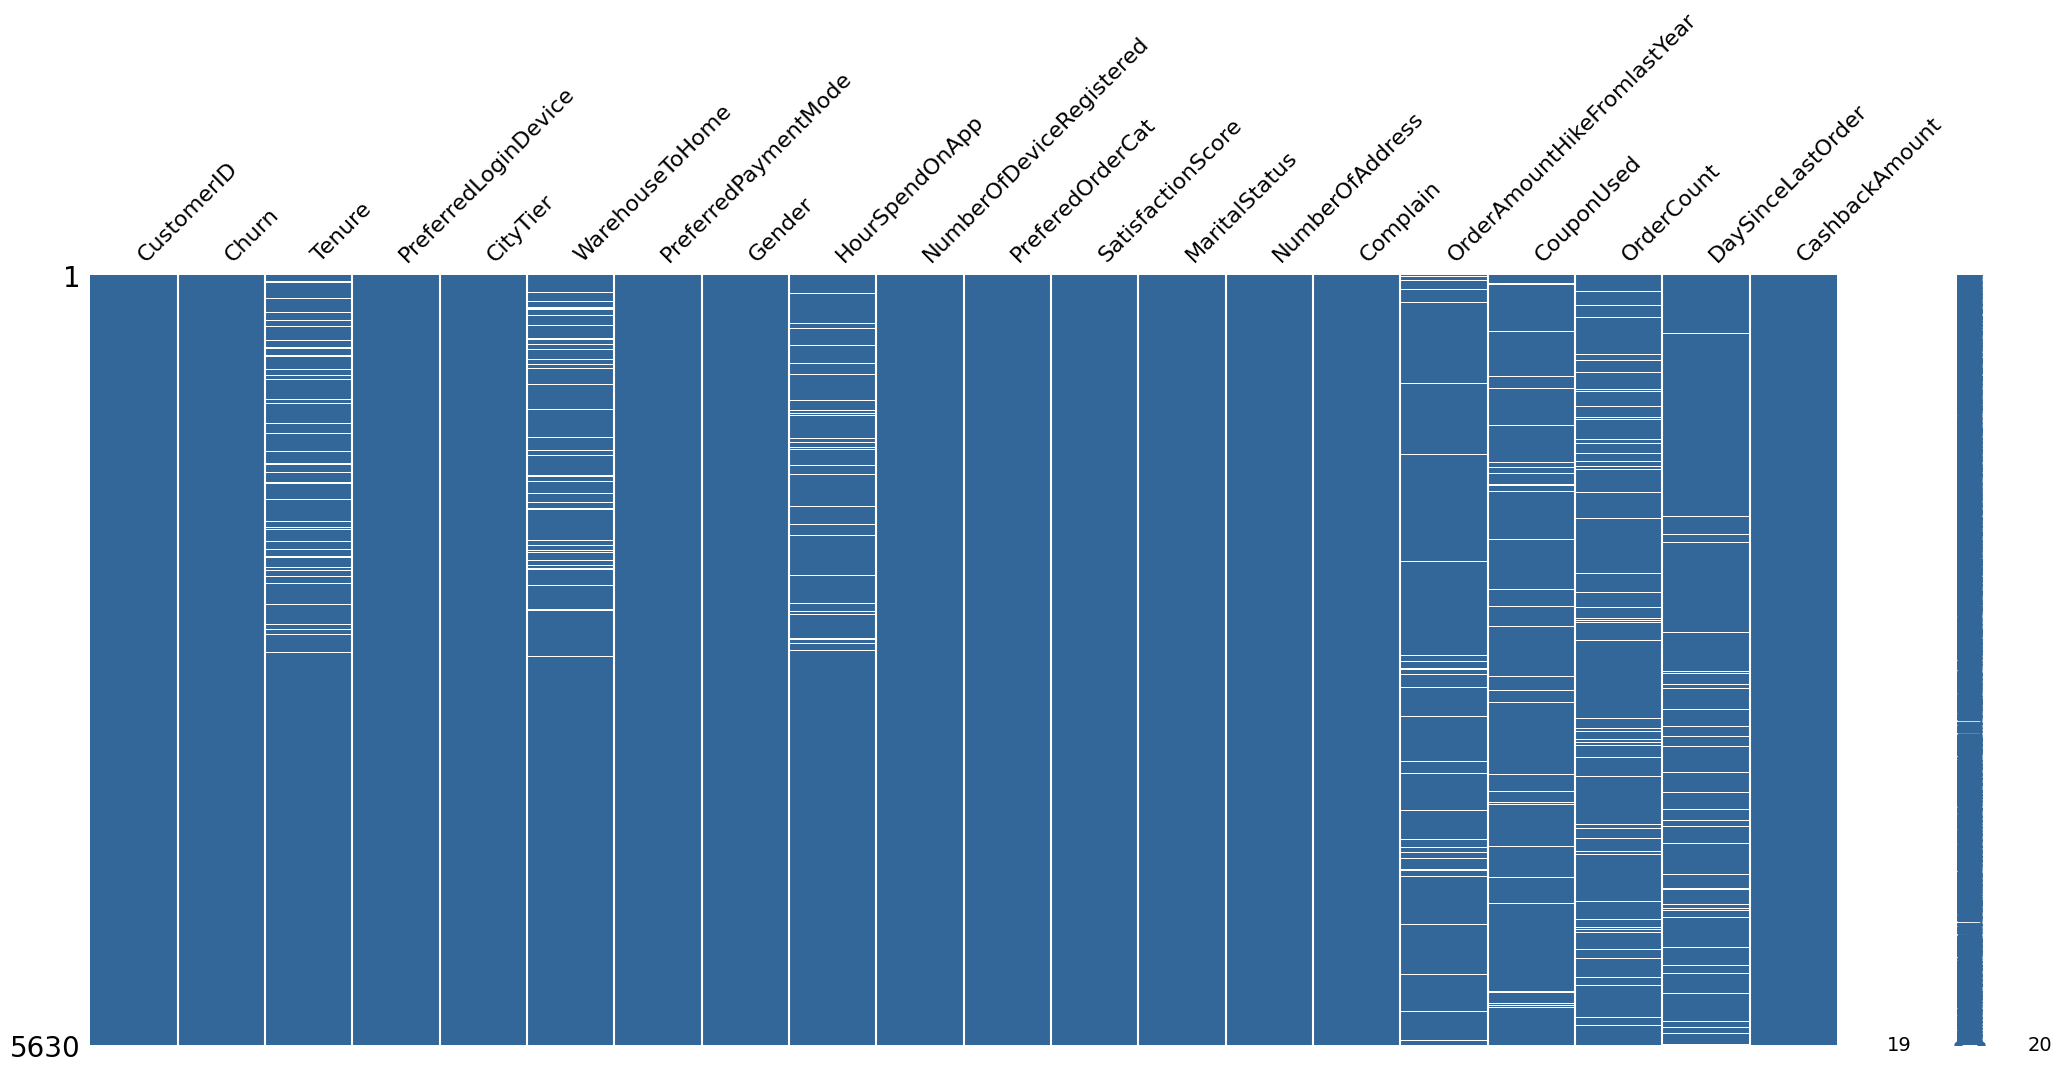

In [120]:
msno.matrix(df_cleaned, color=(0.2, 0.4, 0.6))

In [121]:
# Buat kolom baru yang menunjukkan apakah nilai 'Tenure' itu kosong
df_cleaned['tenure_missing'] = df_cleaned['Tenure'].isnull()
# Hitung tingkat churn untuk pelanggan dengan 'Tenure' kosong vs. yang tidak
churn_rate_by_missingness = df_cleaned.groupby('tenure_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan status nilai 'Tenure' yang hilang:")
print(churn_rate_by_missingness)

# Pembuatan kolom indikator untuk ordercount yang hilang
df_cleaned['is_order_count_missing'] = df_cleaned['OrderCount'].isnull()
# Bandingkan tingkat churn untuk pelanggan dengan OrderCount kosong vs. yang tidak
churn_rate_by_order_missing = df_cleaned.groupby('is_order_count_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan status nilai 'OrderCount' yang hilang:")
print(churn_rate_by_order_missing)


# Buat kolom indikator untuk nilai null di HourSpendOnApp
df_cleaned['hour_spend_missing'] = df_cleaned['HourSpendOnApp'].isnull()
# Bandingkan tingkat churn untuk pelanggan dengan OrderCount kosong vs. yang tidak
churn_rate_by_hour_spend_missing = df_cleaned.groupby('hour_spend_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan status nilai 'HourSpendOnApp' yang hilang:")
print(churn_rate_by_hour_spend_missing)

# Buat kolom indikator untuk daysincelastorder yang hilang
df_cleaned['is_day_since_last_order_missing'] = df_cleaned['DaySinceLastOrder'].isnull()
# Bandingkan tingkat churn untuk pelanggan dengan daysincelastorder kosong vs. yang tidak
churn_rate_by_day_missing = df_cleaned.groupby('is_day_since_last_order_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan nilai hilang di DaySinceLastOrder:")
print(churn_rate_by_day_missing)


# Analisis pola di OrderAmountHikeFromlastYear
df_cleaned['is_order_amount_hike_missing'] = df_cleaned['OrderAmountHikeFromlastYear'].isnull()
churn_rate_by_hike_missing = df_cleaned.groupby('is_order_amount_hike_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan nilai hilang di OrderAmountHikeFromlastYear:")
print(churn_rate_by_hike_missing)

# Analisis pola di CouponUsed
df_cleaned['is_coupon_used_missing'] = df_cleaned['CouponUsed'].isnull()
churn_rate_by_coupon_missing = df_cleaned.groupby('is_coupon_used_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan nilai hilang di CouponUsed:")
print(churn_rate_by_coupon_missing)

# Analisis pola di WarehouseToHome
df_cleaned['is_warehouse_to_home_missing'] = df_cleaned['WarehouseToHome'].isnull()
churn_rate_by_warehouse_missing = df_cleaned.groupby('is_warehouse_to_home_missing')['Churn'].mean() * 100
print("\nTingkat Churn berdasarkan nilai hilang di WarehouseToHome:")
print(churn_rate_by_warehouse_missing)



Tingkat Churn berdasarkan status nilai 'Tenure' yang hilang:
tenure_missing
False    16.157287
True     30.681818
Name: Churn, dtype: float64

Tingkat Churn berdasarkan status nilai 'OrderCount' yang hilang:
is_order_count_missing
False    17.311988
True      6.976744
Name: Churn, dtype: float64

Tingkat Churn berdasarkan status nilai 'HourSpendOnApp' yang hilang:
hour_spend_missing
False    16.558140
True     22.745098
Name: Churn, dtype: float64

Tingkat Churn berdasarkan nilai hilang di DaySinceLastOrder:
is_day_since_last_order_missing
False    16.795040
True     17.589577
Name: Churn, dtype: float64

Tingkat Churn berdasarkan nilai hilang di OrderAmountHikeFromlastYear:
is_order_amount_hike_missing
False    17.409133
True      5.283019
Name: Churn, dtype: float64

Tingkat Churn berdasarkan nilai hilang di CouponUsed:
is_coupon_used_missing
False    17.491626
True      3.125000
Name: Churn, dtype: float64

Tingkat Churn berdasarkan nilai hilang di WarehouseToHome:
is_warehouse_to_

Dari temuan diatas, dari ke 7 kolom yang terdapat nilai null mempunyai indikasi MCAR dan MNAR. Yang mana, kolom DaySinceLastOrder MCAR dan sisa 6 kolom lain MNAR (data yang hilang tidak secara acak)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1236607856.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1236607856.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1236607856.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1236607856.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

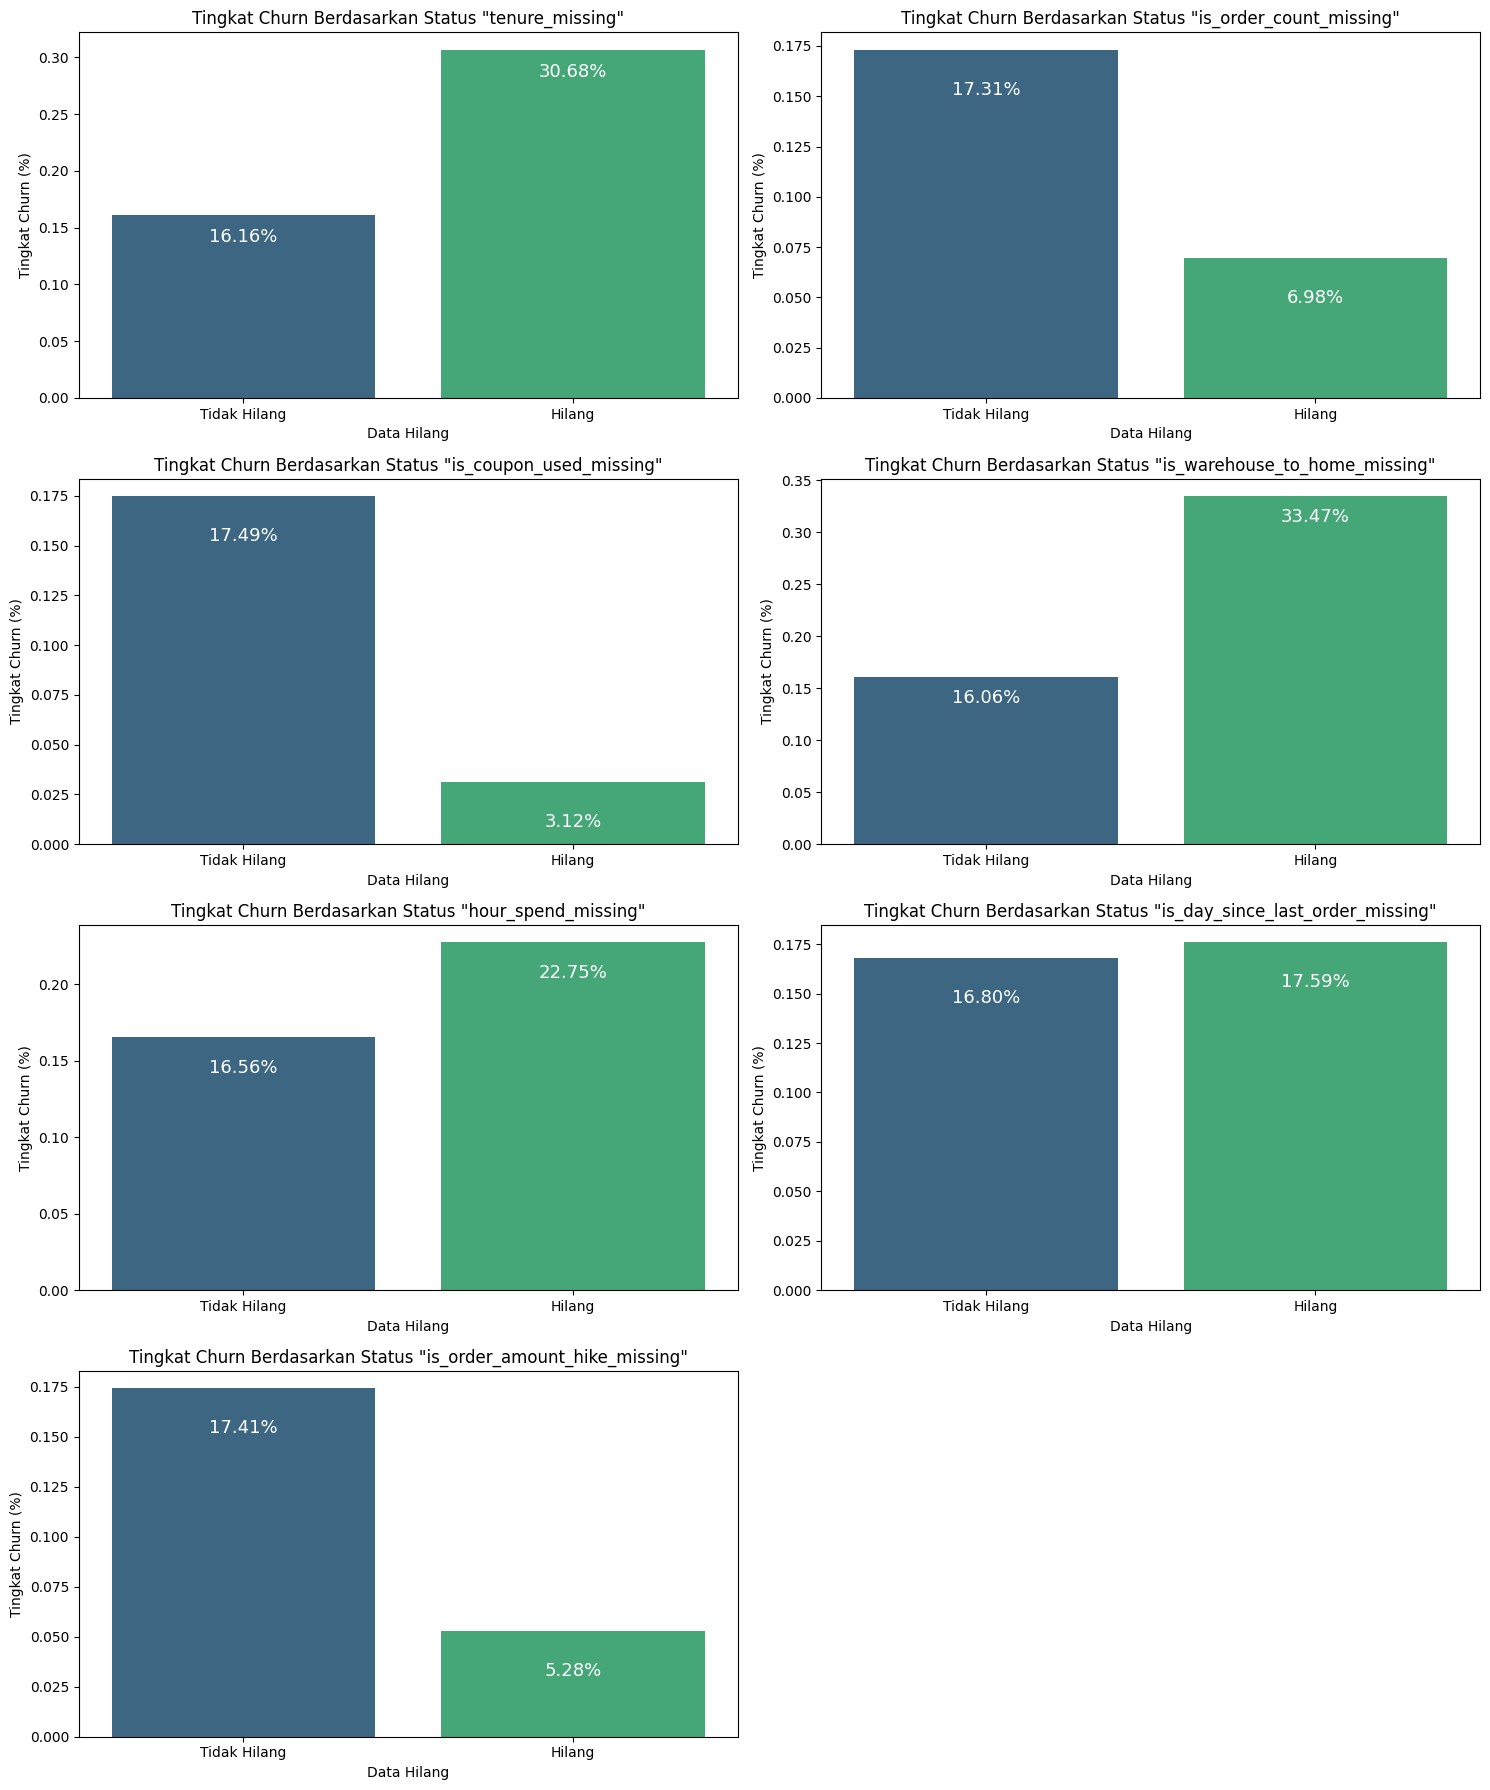

In [122]:
# List kolom indikator
missing_indicators = [
    'tenure_missing',
    'is_order_count_missing',
    'is_coupon_used_missing',
    'is_warehouse_to_home_missing',
    'hour_spend_missing',
    'is_day_since_last_order_missing',
    'is_order_amount_hike_missing'
]

# Ukuran untuk semua grafik
plt.figure(figsize=(15, 18))

# Loop melalui setiap kolom indikator untuk membuat grafik batang
for i, col in enumerate(missing_indicators):
    plt.subplot(4, 2, i + 1)
    
    # Hitung proporsi churn
    churn_rates = df_cleaned.groupby(col)['Churn'].mean().reset_index()
    
    sns.barplot(
        x=col,
        y='Churn',
        data=churn_rates,
        palette='viridis'
    )
    
    # Tambahkan label pada grafik
    plt.title(f'Tingkat Churn Berdasarkan Status "{col}"')
    plt.xlabel('Data Hilang')
    plt.ylabel('Tingkat Churn (%)')
    plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])
    
    # Tambahkan nilai di atas batang
    for index, row in churn_rates.iterrows():
        y_position = row['Churn'] - 0.02
        plt.text(row.name, y_position, f'{row["Churn"]:.2%}', color='white', ha='center',va= 'center', fontsize=13)

plt.tight_layout()
plt.show()

# Analisa pola pada DaySinceLastOrder


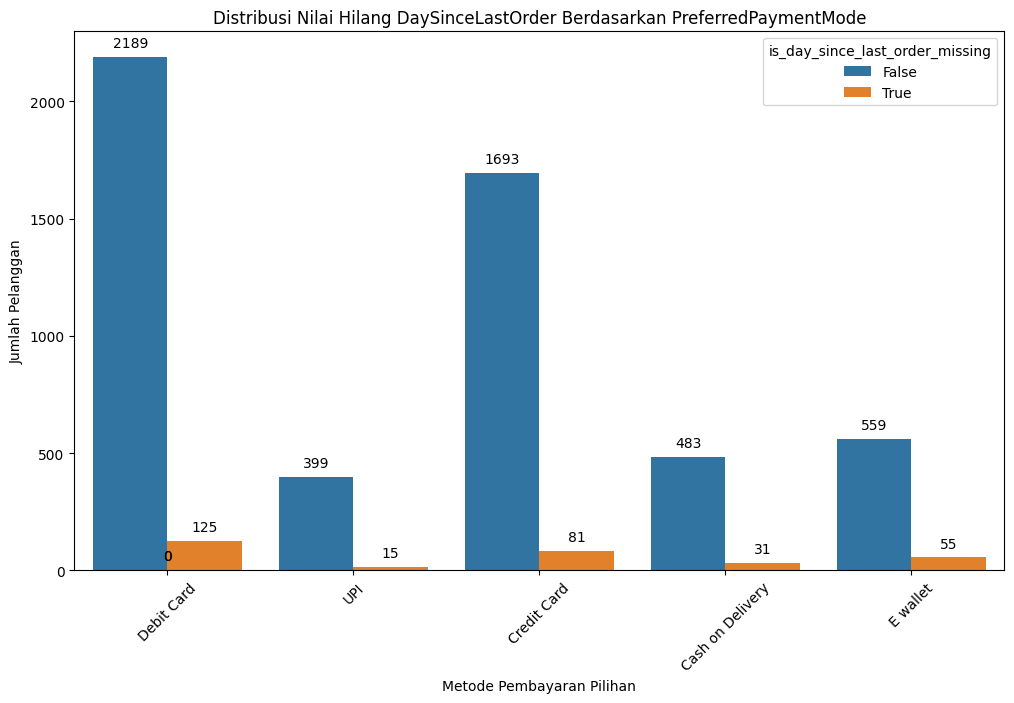

,PreferredPaymentMode,Tidak Hilang,Hilang
0,Cash on Delivery,483,31
1,Credit Card,1693,81
2,Debit Card,2189,125
3,E wallet,559,55
4,UPI,399,15


In [123]:
#DaySinceLastOrder vs PreferredPaymentMode
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_cleaned, x='PreferredPaymentMode', hue='is_day_since_last_order_missing')

plt.title('Distribusi Nilai Hilang DaySinceLastOrder Berdasarkan PreferredPaymentMode')
plt.xlabel('Metode Pembayaran Pilihan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('PreferredPaymentMode')['is_day_since_last_order_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


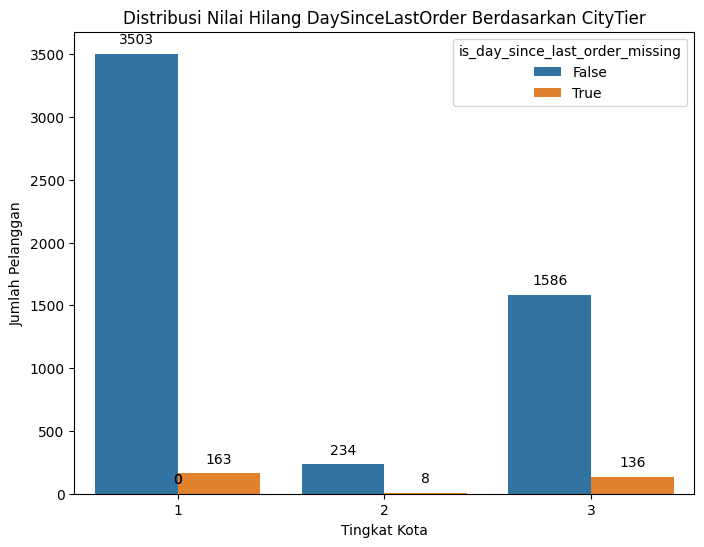

,CityTier,Tidak Hilang,Hilang
0,1,3503,163
1,2,234,8
2,3,1586,136


In [124]:
#  DaySinceLastOrder vs CityTier
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='CityTier', hue='is_day_since_last_order_missing')
plt.title('Distribusi Nilai Hilang DaySinceLastOrder Berdasarkan CityTier')
plt.xlabel('Tingkat Kota')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('CityTier')['is_day_since_last_order_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


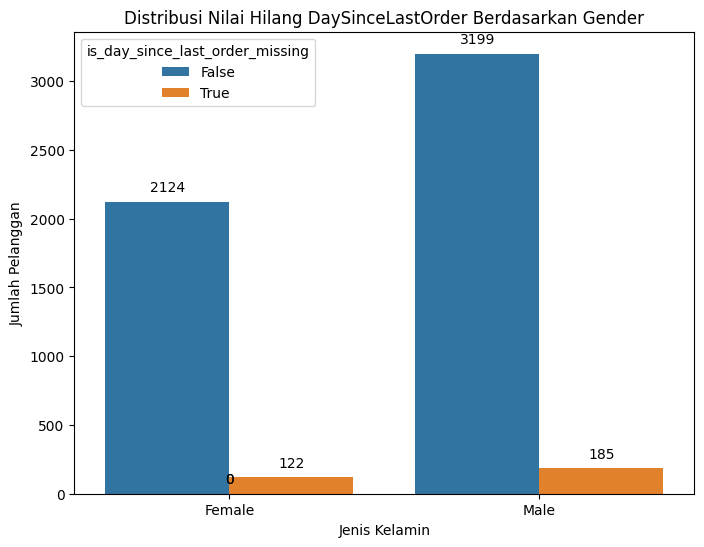

,Gender,Tidak Hilang,Hilang
0,Female,2124,122
1,Male,3199,185


In [125]:

# DaySinceLastOrder vs Gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='Gender', hue='is_day_since_last_order_missing')
plt.title('Distribusi Nilai Hilang DaySinceLastOrder Berdasarkan Gender')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('Gender')['is_day_since_last_order_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


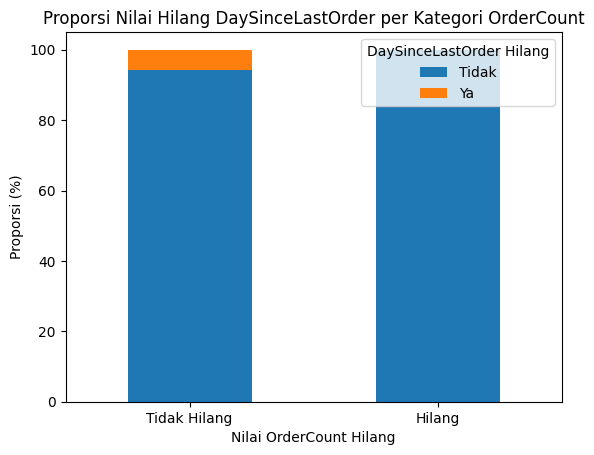

In [126]:
# Visualisasikan hubungan dengan diagram batang bertumpuk
df_cleaned.groupby('is_order_count_missing')['is_day_since_last_order_missing'].value_counts(normalize=True).mul(100).unstack().plot(kind='bar', stacked=True)
plt.title('Proporsi Nilai Hilang DaySinceLastOrder per Kategori OrderCount')
plt.xlabel('Nilai OrderCount Hilang')
plt.ylabel('Proporsi (%)')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'], rotation=0)
plt.legend(title='DaySinceLastOrder Hilang', labels=['Tidak', 'Ya'])
plt.show()

<p style="font-size:large">Batang Kiri (Nilai OrderCount Tidak Hilang): Proporsi terbesar (sekitar 95%) adalah pelanggan yang data DaySinceLastOrder-nya juga tidak hilang. Hanya sebagian kecil dari mereka (sekitar 5%) yang memiliki data DaySinceLastOrder yang hilang. Ini adalah pola yang wajar.

Batang Kanan (Nilai OrderCount Hilang): Ini adalah poin terpenting. 100% dari pelanggan yang data OrderCount-nya hilang tidak memiliki data DaySinceLastOrder yang hilang.

Kesimpulan
Hasil ini membantah hipotesis awal kita yang menyatakan bahwa jika OrderCount hilang, maka DaySinceLastOrder juga harus hilang. Ternyata, polanya justru sebaliknya. Pelanggan yang data OrderCount-nya hilang memiliki data DaySinceLastOrder yang lengkap.
</p> 

# Imputisasi Kolom DaysinceLastOrder

In [127]:
df_cleaned['DaySinceLastOrder'].median()

np.float64(3.0)

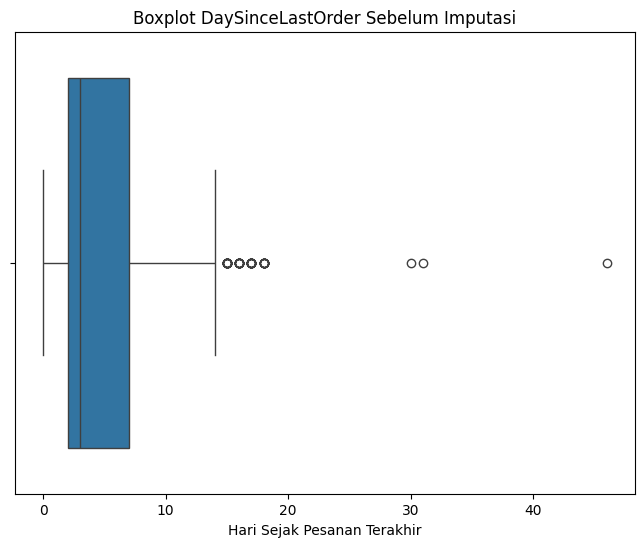

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['DaySinceLastOrder'])
plt.title('Boxplot DaySinceLastOrder Sebelum Imputasi')
plt.xlabel('Hari Sejak Pesanan Terakhir')
plt.show()

In [129]:
# imputisasi kolom daysincelastorder

median_daysince = df_cleaned['DaySinceLastOrder'].median()
df_cleaned['DaySinceLastOrder'].fillna(median_daysince, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\2527049653.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['DaySinceLastOrder'].fillna(median_daysince, inplace=True)


Dilakukan imputisasi dengan metode median pada kolom DaysinceLastOrder, dikarenakan sebaran data cukup merata. Dan, untuk pemilihan metode median, dikarenakan median tidak akan mempengaruhi hasil walupun terdapat data outlier

In [130]:
df_cleaned['DaySinceLastOrder'].isnull().sum()

np.int64(0)

# Mencari pola pada Tenure

In [131]:
# Buat kolom baru yang menunjukkan apakah nilai 'Tenure' itu kosong
df_cleaned['tenure_missing'] = df_cleaned['Tenure'].isnull()

# Hitung tingkat churn untuk pelanggan dengan 'Tenure' kosong vs. yang tidak
churn_rate_by_missingness = df_cleaned.groupby('tenure_missing')['Churn'].mean() * 100

print("\nTingkat Churn berdasarkan status nilai 'Tenure' yang hilang:")
print(churn_rate_by_missingness)


Tingkat Churn berdasarkan status nilai 'Tenure' yang hilang:
tenure_missing
False    16.157287
True     30.681818
Name: Churn, dtype: float64


In [132]:

# Membagi dataset menjadi dua segmen berdasarkan kolom 'tenure_missing'
df_True_tenure = df_cleaned[df_cleaned['tenure_missing'] == True]
df_normal = df_cleaned[df_cleaned['tenure_missing'] == False]

print(f"Jumlah pelanggan di segmen 'Berisiko Tinggi' (tenure_missing): {len(df_True_tenure)}")
print(f"Jumlah pelanggan di segmen 'Normal': {len(df_normal)}")

Jumlah pelanggan di segmen 'Berisiko Tinggi' (tenure_missing): 264
Jumlah pelanggan di segmen 'Normal': 5366


In [133]:
# Analisis distribusi 'Complain' di segmen 'Berisiko Tinggi'
print("\nDistribusi Keluhan di Segmen Berisiko Tinggi:")
complain_distribution = df_True_tenure['Complain'].value_counts(normalize=True) * 100
print(complain_distribution)

# Analisis distribusi 'PreferredPaymentMode' di segmen 'Berisiko Tinggi'
print("\nDistribusi Metode Pembayaran di Segmen Berisiko Tinggi:")
payment_distribution = df_True_tenure['PreferredPaymentMode'].value_counts(normalize=True) * 100
print(payment_distribution)


Distribusi Keluhan di Segmen Berisiko Tinggi:
Complain
0    73.106061
1    26.893939
Name: proportion, dtype: float64

Distribusi Metode Pembayaran di Segmen Berisiko Tinggi:
PreferredPaymentMode
Debit Card          40.151515
Credit Card         33.333333
Cash on Delivery    12.878788
UPI                  8.712121
E wallet             4.924242
Name: proportion, dtype: float64


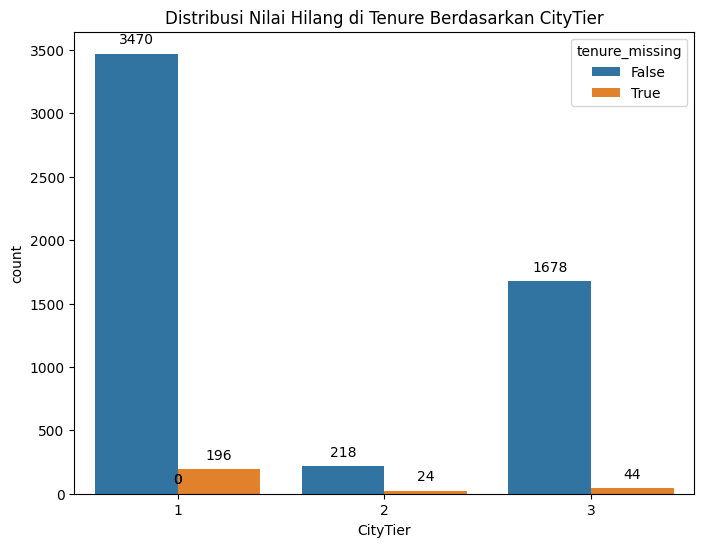

,CityTier,Tidak Hilang,Hilang
0,1,3470,196
1,2,218,24
2,3,1678,44


In [134]:

# Analisis hubungan dengan CityTier
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='CityTier', hue='tenure_missing')
plt.title('Distribusi Nilai Hilang di Tenure Berdasarkan CityTier')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('CityTier')['tenure_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


In [135]:
missing_crosstab = pd.crosstab(df_cleaned['tenure_missing'], df_cleaned['is_order_count_missing'], margins=True)
print("Hubungan Antara Nilai Hilang Tenure dan OrderCount:")
print(missing_crosstab)

Hubungan Antara Nilai Hilang Tenure dan OrderCount:
is_order_count_missing  False  True   All
tenure_missing                           
False                    5108   258  5366
True                      264     0   264
All                      5372   258  5630


# Melihat pola pada OrderCount


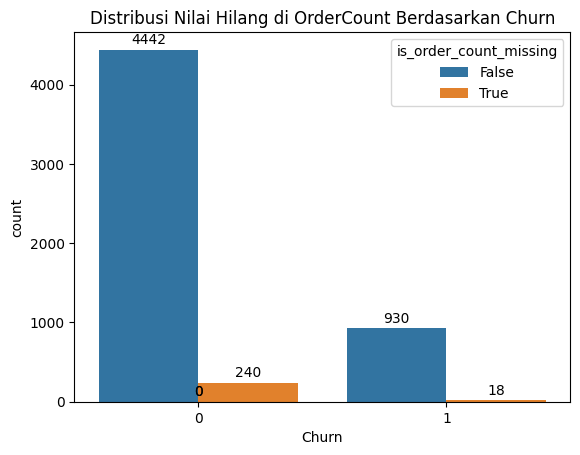

,Churn,Tidak Hilang,Hilang
0,0,4442,240
1,1,930,18


In [136]:
plt.Figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='Churn', hue='is_order_count_missing')
plt.title('Distribusi Nilai Hilang di OrderCount Berdasarkan Churn')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('Churn')['is_order_count_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()

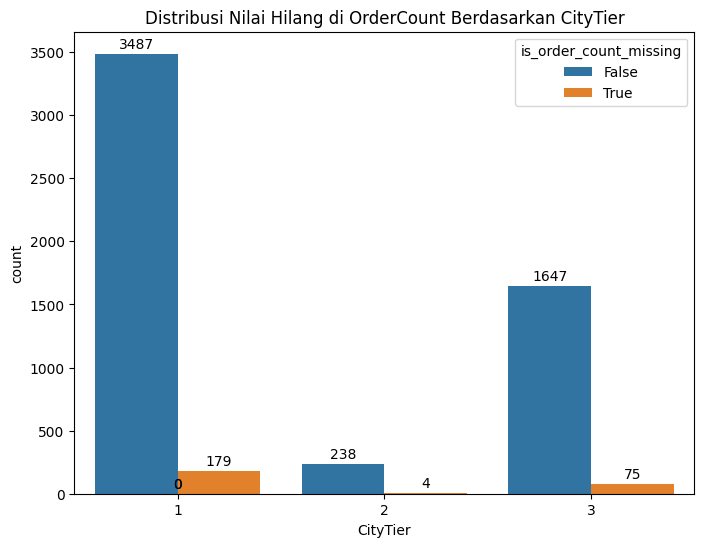

,CityTier,Tidak Hilang,Hilang
0,1,3487,179
1,2,238,4
2,3,1647,75


In [137]:

# Analisis hubungan dengan CityTier
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='CityTier', hue='is_order_count_missing')
plt.title('Distribusi Nilai Hilang di OrderCount Berdasarkan CityTier')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('CityTier')['is_order_count_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()

Berdasarkan pencarian pola, adanya pola yang sangat kontras. Pelanggan yang datanya hilang pada kolom OrderCount cenderung sangat loyal dan memiliki tingkat churn yang sangat rendah. Ini adalah segmen pelanggan yang berharga bagi perusahaan dan harus dipertahankan. Sebaliknya, pelanggan yang datanya lengkap memiliki tingkat churn yang jauh lebih tinggi.

Data juga menunjukkan bahwa data OrderCount yang hilang tidak tersebar merata di seluruh tingkat kota. Ada proporsi yang lebih tinggi dari data yang hilang di CityTier 1. Ini bisa mengindikasikan masalah teknis atau operasional dalam pengumpulan data pelanggan di kota-kota besar.

# Analisa pola pada HourSpendOnApps

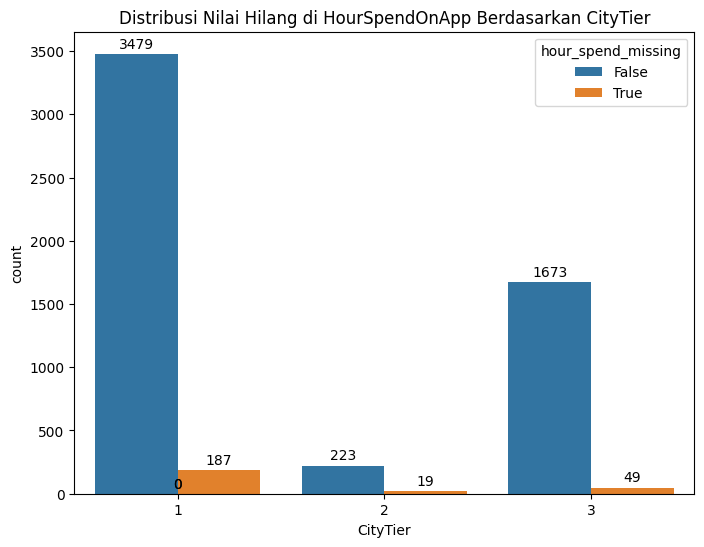

,CityTier,Tidak Hilang,Hilang
0,1,3479,187
1,2,223,19
2,3,1673,49


In [138]:

# Analisis hubungan dengan CityTier
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='CityTier', hue='hour_spend_missing')
plt.title('Distribusi Nilai Hilang di HourSpendOnApp Berdasarkan CityTier')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('CityTier')['hour_spend_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


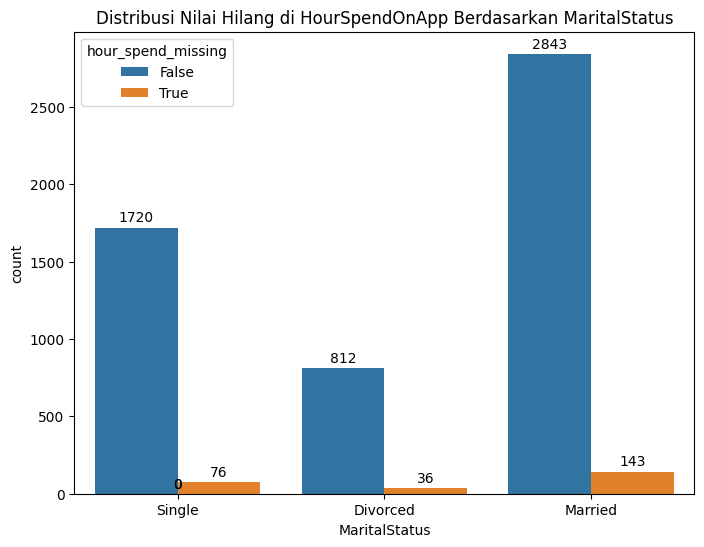

,MaritalStatus,Tidak Hilang,Hilang
0,Divorced,812,36
1,Married,2843,143
2,Single,1720,76


In [139]:
# Analisis hubungan dengan MaritalStatus
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='MaritalStatus', hue='hour_spend_missing')
plt.title('Distribusi Nilai Hilang di HourSpendOnApp Berdasarkan MaritalStatus')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('MaritalStatus')['hour_spend_missing'].value_counts().unstack(fill_value=0)

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['Tidak Hilang', 'Hilang']

# Tampilkan dataframe
summary_df.sort_index().reset_index()

# Analisa pola pada CoupunUsed

In [140]:
# Buat tabel silang untuk melihat hubungan
missing_crosstab_order = pd.crosstab(df_cleaned['is_coupon_used_missing'], df_cleaned['OrderCount'].isnull(), margins=True)
print("Hubungan Antara Nilai Hilang CouponUsed dan OrderCount:")
print(missing_crosstab_order)

# Bandingkan rata-rata CashbackAmount antara pelanggan dengan dan tanpa nilai null di CouponUsed
avg_cashback = df_cleaned.groupby('is_coupon_used_missing')['CashbackAmount'].mean()
print("Rata-rata CashbackAmount berdasarkan nilai hilang di CouponUsed:")
print(avg_cashback)

Hubungan Antara Nilai Hilang CouponUsed dan OrderCount:
OrderCount              False  True   All
is_coupon_used_missing                   
False                    5116   258  5374
True                      256     0   256
All                      5372   258  5630
Rata-rata CashbackAmount berdasarkan nilai hilang di CouponUsed:
is_coupon_used_missing
False    172.507520
True     276.211914
Name: CashbackAmount, dtype: float64


In [141]:
#melihat statistik deskriptif lain untuk perbandingan

desc_cashback = df_cleaned.groupby('is_coupon_used_missing')['CashbackAmount'].describe()
print("\nStatistik Deskriptif CashbackAmount:")
print(desc_cashback)


Statistik Deskriptif CashbackAmount:
                         count        mean        std     min       25%  \
is_coupon_used_missing                                                    
False                   5374.0  172.507520  45.195825    0.00  145.2325   
True                     256.0  276.211914  10.187445  260.91  267.4000   

                           50%       75%     max  
is_coupon_used_missing                            
False                   160.80  189.3900  324.99  
True                    275.16  286.3425  291.90  


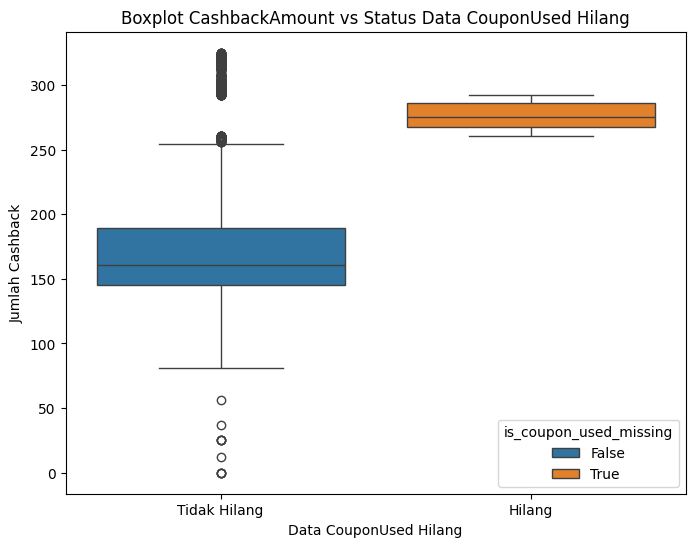

In [142]:
# Visualisasikan hubungan dengan CashbackAmount
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_coupon_used_missing', y='CashbackAmount', data=df_cleaned, hue='is_coupon_used_missing')
plt.title('Boxplot CashbackAmount vs Status Data CouponUsed Hilang')
plt.xlabel('Data CouponUsed Hilang')
plt.ylabel('Jumlah Cashback')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])
plt.show()

secara definitif membuktikan bahwa nilai yang hilang pada kolom CouponUsed adalah MNAR. Nilai yang hilang ini adalah indikator bahwa pelanggan ini mendapatkan cashback yang lebih tinggi dan konsisten, yang kemungkinan besar berasal dari program loyalitas atau promosi lain yang tidak menggunakan kupon.



# Imputisasi column Null

In [143]:
# Kolom Tenure
# Pola: Tingkat churn JAUH lebih tinggi
df_cleaned['is_tenure_missing'] = df_cleaned['Tenure'].isnull()
df_cleaned['Tenure'].fillna(-1, inplace=True)

# Kolom HourSpendOnApp
# Pola: Tingkat churn lebih tinggi
df_cleaned['is_hour_spend_missing'] = df_cleaned['HourSpendOnApp'].isnull()
df_cleaned['HourSpendOnApp'].fillna(-1, inplace=True)

# Kolom OrderCount
# Pola: Tingkat churn JAUH lebih rendah (kemungkinan pelanggan baru)
df_cleaned['is_order_count_missing'] = df_cleaned['OrderCount'].isnull()
df_cleaned['OrderCount'].fillna(0, inplace=True)

# Kolom OrderAmountHikeFromlastYear
# Pola: Tingkat churn JAUH lebih rendah
df_cleaned['is_order_amount_hike_missing'] = df_cleaned['OrderAmountHikeFromlastYear'].isnull()
df_cleaned['OrderAmountHikeFromlastYear'].fillna(-1, inplace=True)

# Kolom CouponUsed
# Pola: Tingkat churn JAUH lebih rendah
df_cleaned['is_coupon_used_missing'] = df_cleaned['CouponUsed'].isnull()
df_cleaned['CouponUsed'].fillna(0, inplace=True)

# Kolom WarehouseToHome
# Pola: Tingkat churn JAUH lebih tinggi
df_cleaned['is_warehouse_to_home_missing'] = df_cleaned['WarehouseToHome'].isnull()
df_cleaned['WarehouseToHome'].fillna(-1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1844058297.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Tenure'].fillna(-1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1844058297.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [144]:
df_cleaned.isnull().sum()

CustomerID                         0
Churn                              0
Tenure                             0
PreferredLoginDevice               0
CityTier                           0
WarehouseToHome                    0
PreferredPaymentMode               0
Gender                             0
HourSpendOnApp                     0
NumberOfDeviceRegistered           0
PreferedOrderCat                   0
SatisfactionScore                  0
MaritalStatus                      0
NumberOfAddress                    0
Complain                           0
OrderAmountHikeFromlastYear        0
CouponUsed                         0
OrderCount                         0
DaySinceLastOrder                  0
CashbackAmount                     0
tenure_missing                     0
is_order_count_missing             0
hour_spend_missing                 0
is_day_since_last_order_missing    0
is_order_amount_hike_missing       0
is_coupon_used_missing             0
is_warehouse_to_home_missing       0
i

# EDA

In [145]:
df_cleaned.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,9.665187,1.654707,14.898046,2.753464,3.688988,3.066785,4.214032,0.284902,14.921492,1.671403,2.870160,4.459325,177.223030
std,1625.385339,0.374240,8.682696,0.915389,9.018678,1.079847,1.023999,1.380194,2.583586,0.451408,5.039501,1.886648,2.939615,3.570626,49.207036
min,50001.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,8.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


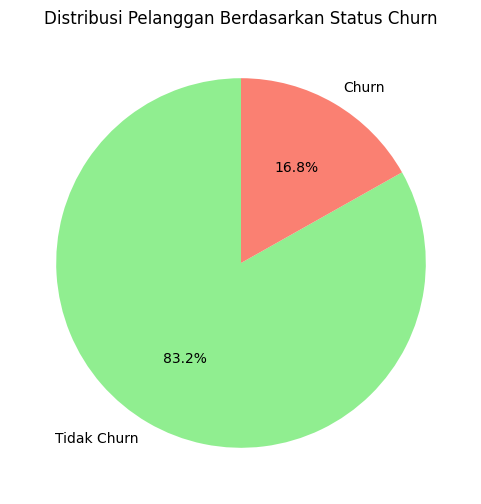

In [146]:
# Visualisasi persentase churn menggunakan pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_percen,
    labels=['Tidak Churn', 'Churn'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon']
)
plt.title('Distribusi Pelanggan Berdasarkan Status Churn')
plt.show()

# Identifikasi Pendorong utama churn

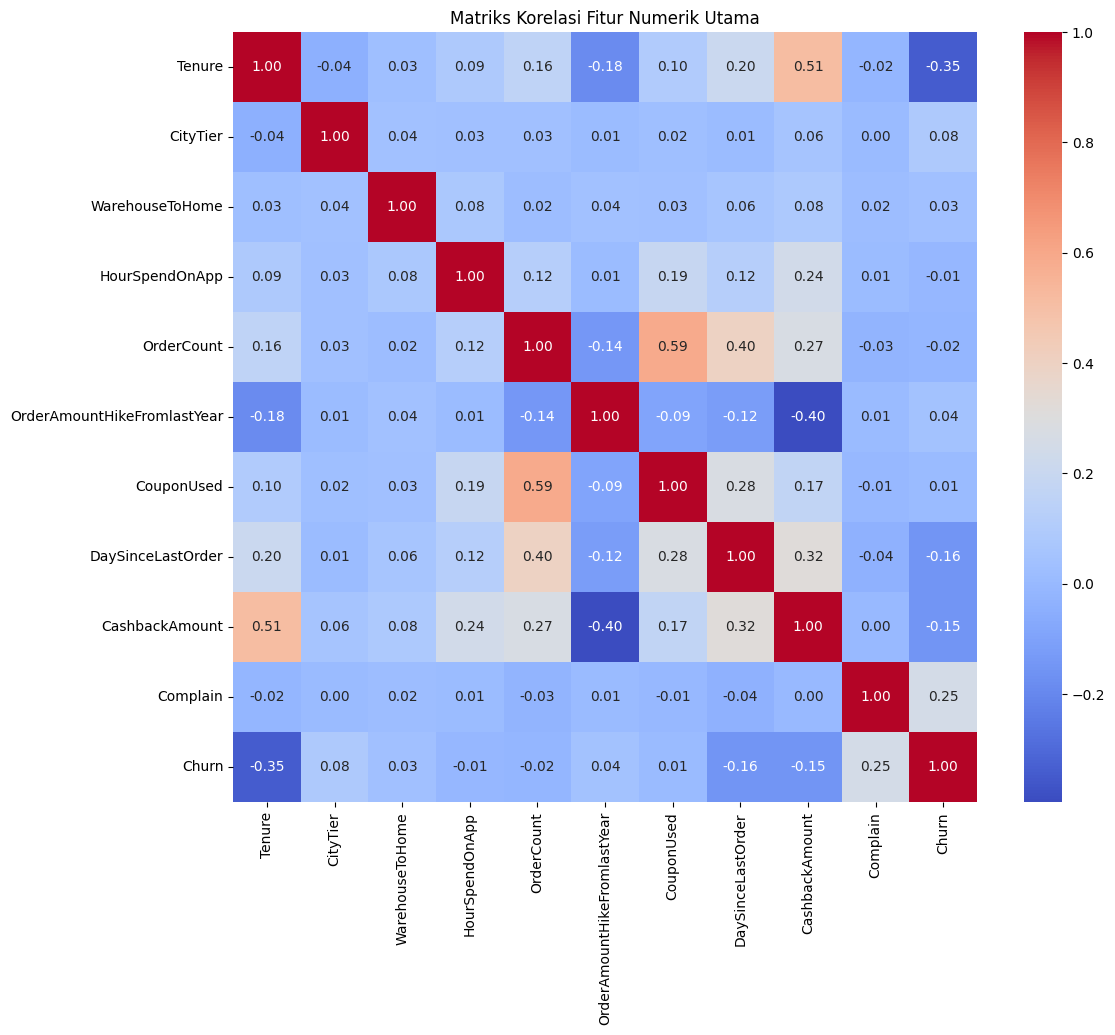

In [147]:


# Pilih fitur-fitur numerik utama
numerical_features = [
    'Tenure',
    'CityTier',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderCount',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'DaySinceLastOrder',
    'CashbackAmount',
    'Complain',
    'Churn'
]

# Hitung matriks korelasi
correlation_matrix_1 = df_cleaned[numerical_features].corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik Utama')
plt.show()

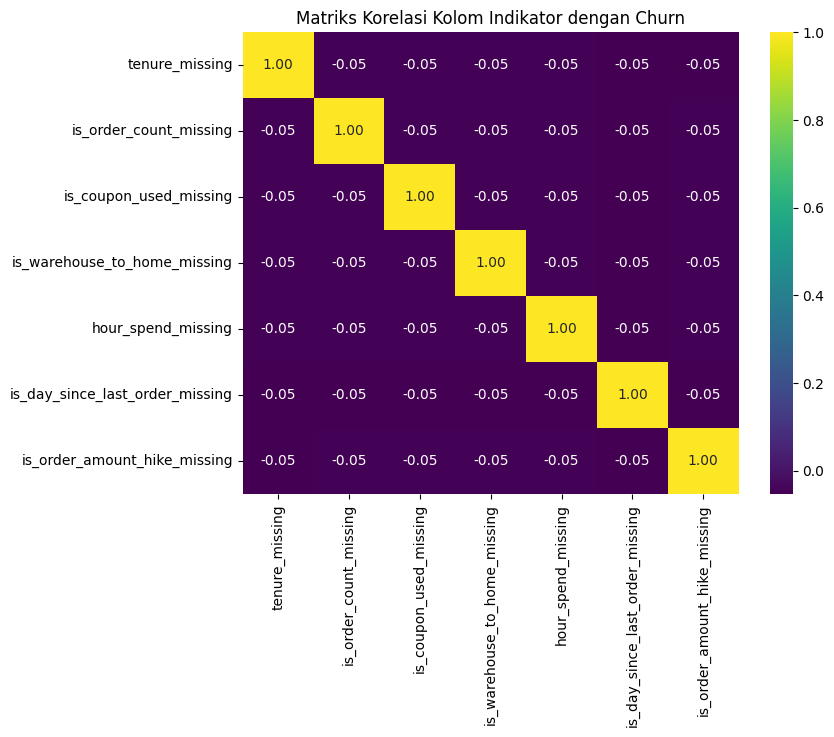

In [148]:

# Hitung matriks korelasi
correlation_matrix_2 = df_cleaned[missing_indicators].corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriks Korelasi Kolom Indikator dengan Churn')
plt.show()

-. Terdapat korelasi positif yang signifikan (+0.25) antara Complain dan Churn

-. korelasi negatif yang kuat (-0.35) antara Tenure dan Churn, yang berarti semakin lama pelanggan menjadi pelanggan, semakin kecil kemungkinannya untuk churn.

-.  Heatmap pada WarehouseToHome menunjukkan korelasi yang sangat lemah

-. Matriks korelasi kolom indikator (is_tenure_missing) menunjukkan korelasi positif yang kecil (+0.08) dengan Churn

# Analisa Tenure terhadap Churn

In [149]:
# Buat tabel silang untuk menghitung proporsi churn
# ini menunjukkan rasio churn per kelompok (Hilang vs Tidak Hilang)
churn_prop = pd.crosstab(
    df_cleaned['is_tenure_missing'],
    df_cleaned['Churn'],
    normalize='index'
) * 100

# Ubah nama kolom agar lebih mudah dibaca
churn_prop.columns = ['Persen Tidak Churn', 'Persen Churn']
churn_prop.index = ['Data Tenure Tidak Hilang', 'Data Tenure Hilang']

# Tampilkan hasilnya
print("Proporsi Churn Berdasarkan Status Data Tenure:")
print(churn_prop)

Proporsi Churn Berdasarkan Status Data Tenure:
                          Persen Tidak Churn  Persen Churn
Data Tenure Tidak Hilang           83.842713     16.157287
Data Tenure Hilang                 69.318182     30.681818


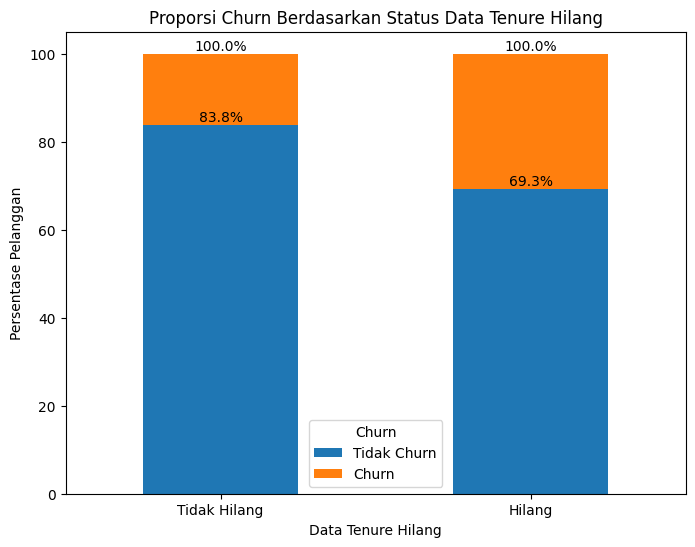

In [150]:
# Visualisasi dengan stacked bar chart
churn_prop.plot(kind='bar', stacked=True, figsize=(8, 6))

# Tambahkan label pada grafik
plt.title('Proporsi Churn Berdasarkan Status Data Tenure Hilang')
plt.xlabel('Data Tenure Hilang')
plt.ylabel('Persentase Pelanggan')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'], rotation=0)

# Tambahkan keterangan (legend)
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])

# Tambahkan teks nilai di atas setiap batang
for bar in plt.gca().containers:
    plt.gca().bar_label(bar, fmt='%.1f%%')

plt.show()

Pelanggan dengan Data Lengkap: Kelompok ini, yang datanya tidak hilang, memiliki tingkat churn sekitar 16.16%. 

Pelanggan dengan Data Hilang: Ini adalah wawasan terpenting. Kelompok ini memiliki tingkat churn yang melonjak tajam menjadi 30.68%.


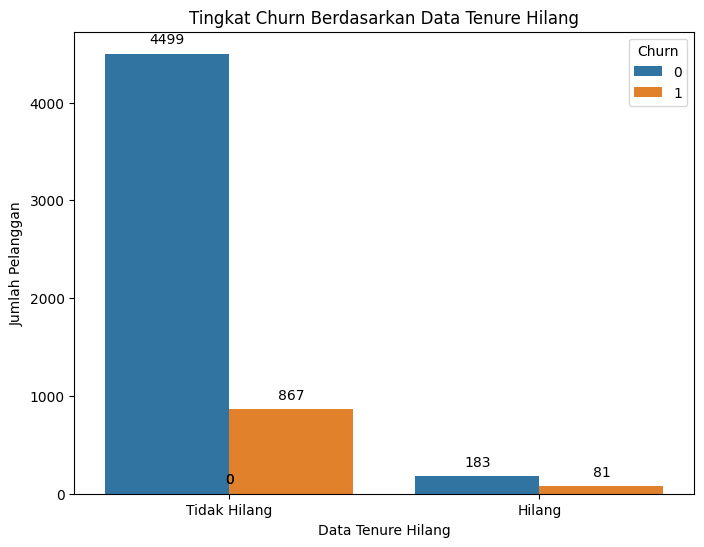

,is_tenure_missing,0,1
0,False,4499,867
1,True,183,81


In [151]:
# Analisis Churn vs is_tenure_missing
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_tenure_missing', hue='Churn', data=df_cleaned)
plt.title('Tingkat Churn Berdasarkan Data Tenure Hilang')
plt.xlabel('Data Tenure Hilang')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('is_tenure_missing')['Churn'].value_counts().unstack()

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['0', '1']

# Tampilkan dataframe
summary_df.sort_index().reset_index()


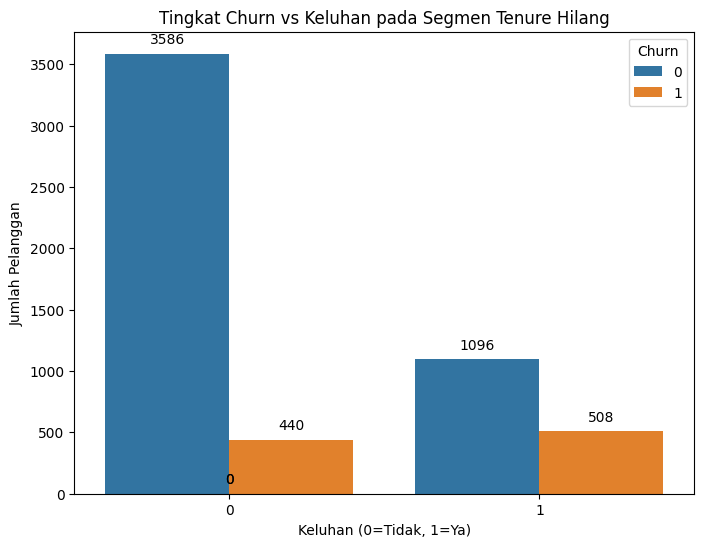

,is_tenure_missing,0,1
0,False,4499,867
1,True,183,81


In [152]:
# Visualisasikan
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Complain', hue='Churn', data=df_cleaned)
plt.title('Tingkat Churn vs Keluhan pada Segmen Tenure Hilang')
plt.xlabel('Keluhan (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Tampilkan dataframe
summary_df.sort_index().reset_index()


# Analisa pada OrderCount

C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\3631470263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


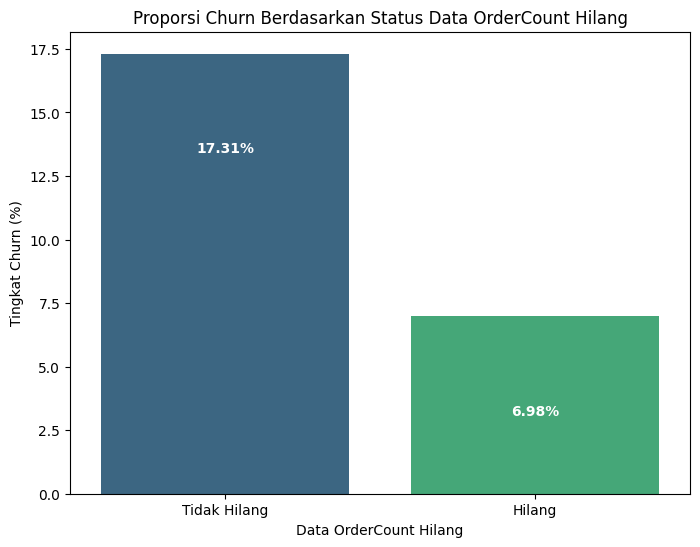

In [153]:
# Hitung proporsi churn berdasarkan status 'is_order_count_missing'
churn_rate_by_order_missing = df_cleaned.groupby('is_order_count_missing')['Churn'].mean().reset_index()

# Konversi proporsi ke persentase untuk label
churn_rate_by_order_missing['Churn_percent'] = churn_rate_by_order_missing['Churn'] * 100

# Buat grafik batang
plt.figure(figsize=(8, 6))
sns.barplot(
    x='is_order_count_missing', 
    y='Churn_percent', 
    data=churn_rate_by_order_missing, 
    palette='viridis'
)

# Tambahkan label pada grafik
plt.title('Proporsi Churn Berdasarkan Status Data OrderCount Hilang')
plt.xlabel('Data OrderCount Hilang')
plt.ylabel('Tingkat Churn (%)')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])

# Tambahkan nilai persentase di dalam setiap batang
for index, row in churn_rate_by_order_missing.iterrows():
    plt.text(
        row.name, 
        row['Churn_percent'] - 4.0,  
        f'{row["Churn_percent"]:.2f}%', 
        color='white',  # Mengubah warna teks menjadi putih agar terlihat jelas
        ha='center',
        va='bottom', # Vertikal alignment di bagian bawah
        fontweight='bold'
    )

plt.show()

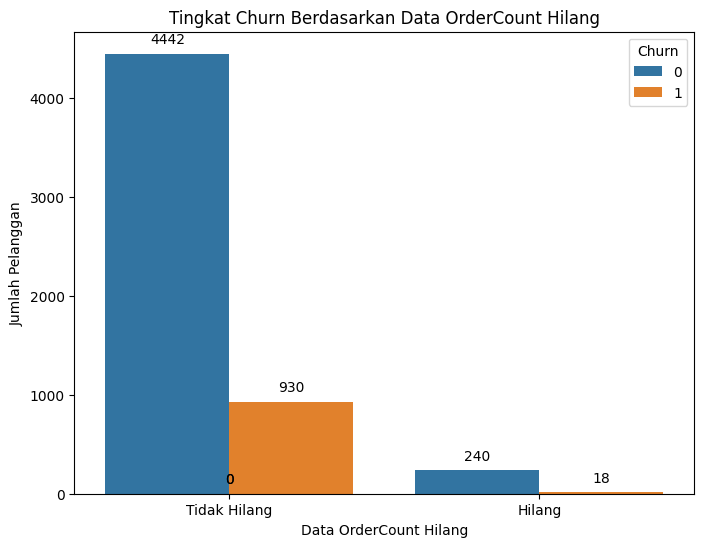

Churn,is_order_count_missing,0,1
0,False,4442,930
1,True,240,18


In [154]:
# Visualisasi dengan bar chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_order_count_missing', hue='Churn', data=df_cleaned)
plt.title('Tingkat Churn Berdasarkan Data OrderCount Hilang')
plt.xlabel('Data OrderCount Hilang')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('is_order_count_missing')['Churn'].value_counts().unstack()

# Tampilkan dataframe
summary_df.sort_index().reset_index()

# Analisa pada CashbackAmount

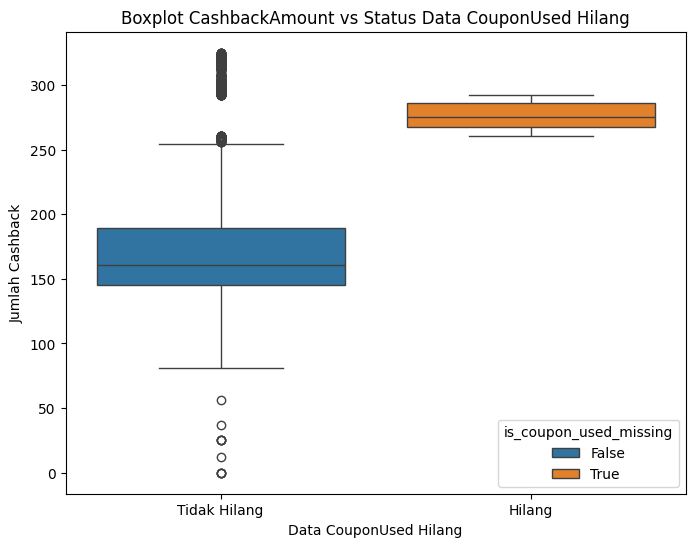

In [155]:
# Visualisasikan hubungan dengan CashbackAmount
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_coupon_used_missing', y='CashbackAmount', data=df_cleaned, hue='is_coupon_used_missing')
plt.title('Boxplot CashbackAmount vs Status Data CouponUsed Hilang')
plt.xlabel('Data CouponUsed Hilang')
plt.ylabel('Jumlah Cashback')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])
plt.show()

Kelompok "Tidak Hilang": Kotak pada sisi kiri menunjukkan distribusi CashbackAmount untuk pelanggan yang datanya lengkap. Mediannya berada di kisaran ~160, dan distribusinya memiliki rentang yang luas, dengan beberapa outlier yang mencapai nilai yang sangat tinggi.

Kelompok "Hilang": Kotak di sisi kanan adalah wawasan kuncinya. Kotak ini posisinya jauh lebih tinggi, dengan median di sekitar ~275. Kotaknya juga jauh lebih sempit, menunjukkan bahwa CashbackAmount untuk kelompok ini sangat terkonsentrasi di satu kisaran nilai.

# Analisa Churn terhadap CityTier

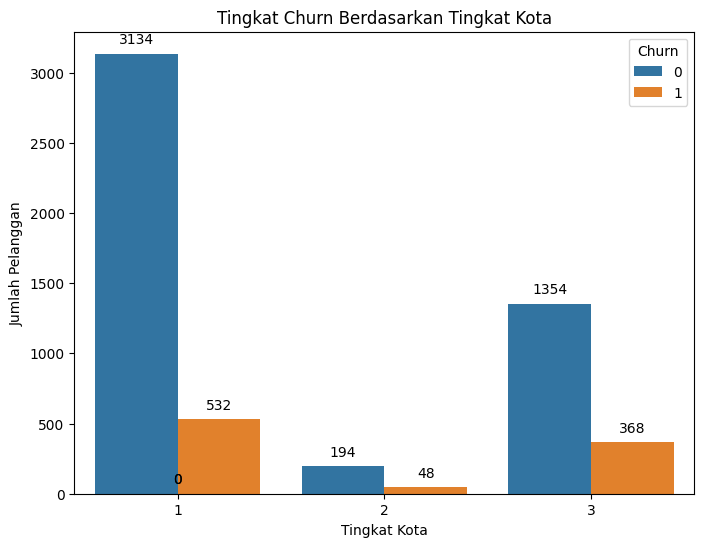

,CityTier,0,1
0,1,3134,532
1,2,194,48
2,3,1354,368


In [156]:
# Analisis Churn vs CityTier
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CityTier', hue='Churn', data=df_cleaned)
plt.title('Tingkat Churn Berdasarkan Tingkat Kota')
plt.xlabel('Tingkat Kota')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('CityTier')['Churn'].value_counts().unstack()

# Ubah nama kolom agar lebih jelas
summary_df.columns = ['0', '1']

# Tampilkan dataframe
summary_df.sort_index().reset_index()



In [157]:
# Hitung tabel silang (crosstab) antara CityTier dan Churn, dengan persentase
# Normalisasi 'index' akan menampilkan persentase churn dalam setiap baris CityTier
churn_by_city_tier = pd.crosstab(
    df_cleaned['CityTier'],
    df_cleaned['Churn'],
    normalize='index'
) * 100

# Ubah nama kolom agar lebih mudah dibaca
churn_by_city_tier.columns = ['Persen Tidak Churn', 'Persen Churn']

# Tampilkan hasilnya
print("Persentase Churn Berdasarkan CityTier:")
print(churn_by_city_tier)

Persentase Churn Berdasarkan CityTier:
          Persen Tidak Churn  Persen Churn
CityTier                                  
1                  85.488271     14.511729
2                  80.165289     19.834711
3                  78.629501     21.370499


Tingkat Churn Tertinggi: CityTier 3 memiliki tingkat churn tertinggi sebesar 21.37%.

Tingkat Churn Terendah: CityTier 1 memiliki tingkat churn terendah sebesar 14.51%.

# Analisa pada WarehouseToHome

C:\Users\DELL\AppData\Local\Temp\ipykernel_8444\1261599545.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


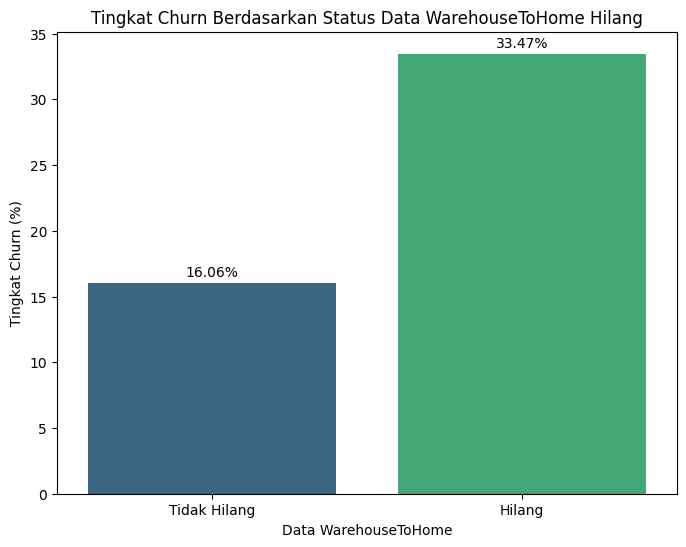

In [158]:
# Hitung proporsi churn berdasarkan status 'is_warehouse_to_home_missing'
churn_rate_by_warehouse_missing = df_cleaned.groupby('is_warehouse_to_home_missing')['Churn'].mean().reset_index()

# Konversi proporsi ke persentase untuk label
churn_rate_by_warehouse_missing['Churn_percent'] = churn_rate_by_warehouse_missing['Churn'] * 100

# Buat grafik batang
plt.figure(figsize=(8, 6))
sns.barplot(
    x='is_warehouse_to_home_missing', 
    y='Churn_percent', 
    data=churn_rate_by_warehouse_missing, 
    palette='viridis'
)

# Tambahkan label pada grafik
plt.title('Tingkat Churn Berdasarkan Status Data WarehouseToHome Hilang')
plt.xlabel('Data WarehouseToHome')
plt.ylabel('Tingkat Churn (%)')
plt.xticks(ticks=[0, 1], labels=['Tidak Hilang', 'Hilang'])

# Tambahkan nilai persentase di atas setiap batang
for index, row in churn_rate_by_warehouse_missing.iterrows():
    plt.text(
        row.name, 
        row['Churn_percent'] + 0.5, 
        f'{row["Churn_percent"]:.2f}%', 
        color='black', 
        ha='center'
    )

plt.show()

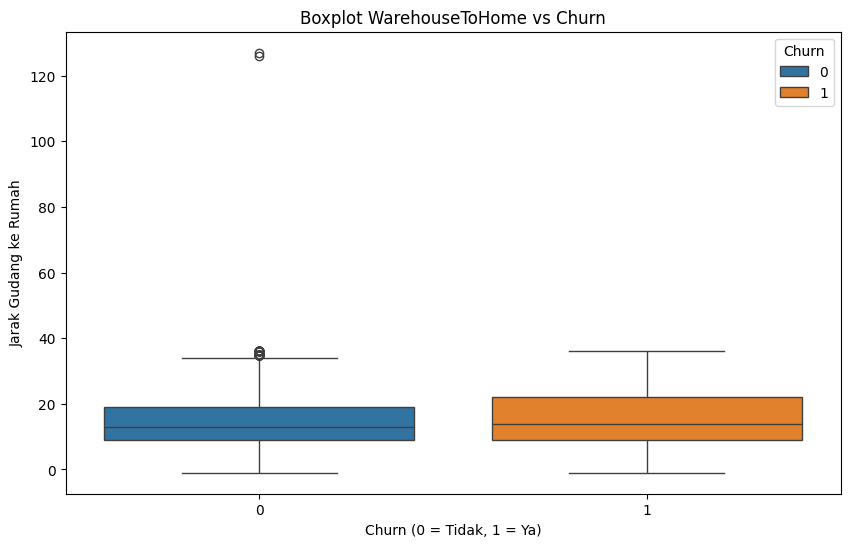


Rata-rata Jarak Gudang ke Rumah per Status Churn:
Churn
0    14.770611
1    15.527426
Name: WarehouseToHome, dtype: float64


In [159]:
# Buat boxplot untuk membandingkan distribusi WarehouseToHome
# antara pelanggan yang churn dan tidak
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df_cleaned, hue='Churn')
plt.title('Boxplot WarehouseToHome vs Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Jarak Gudang ke Rumah')
plt.show()

# Hitung rata-rata jarak untuk setiap kelompok churn
avg_distance = df_cleaned.groupby('Churn')['WarehouseToHome'].mean()
print("\nRata-rata Jarak Gudang ke Rumah per Status Churn:")
print(avg_distance)

<p style='font-size:large'>Rata-rata Jarak: Rata-rata jarak WarehouseToHome untuk pelanggan yang churn (15.53) sedikit lebih tinggi daripada yang tidak churn (14.77).

Visualisasi Boxplot: Boxplot menunjukkan bahwa rentang jarak untuk pelanggan yang churn memiliki median yang sedikit lebih tinggi dan sebaran yang sedikit lebih luas. Ini menunjukkan adanya variasi dalam pengalaman pengiriman.</p>

# Analisa berdasarkan Gender

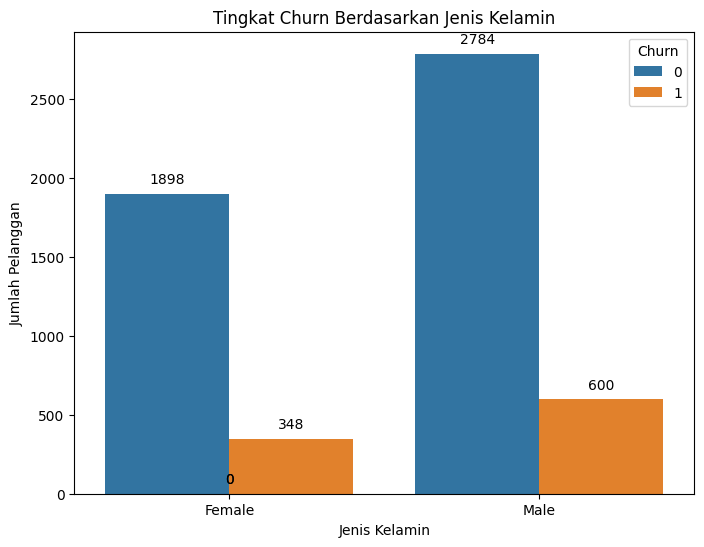

Churn,Gender,0,1
0,Female,1898,348
1,Male,2784,600


In [160]:
# Analisis Churn vs Gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', hue='Churn', data=df_cleaned)
plt.title('Tingkat Churn Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Hitung jumlah untuk setiap kategori
summary_df = df_cleaned.groupby('Gender')['Churn'].value_counts().unstack()

# Tampilkan dataframe
summary_df.sort_index().reset_index()

# Analisa Churn berdasarkan Kategori pesanan

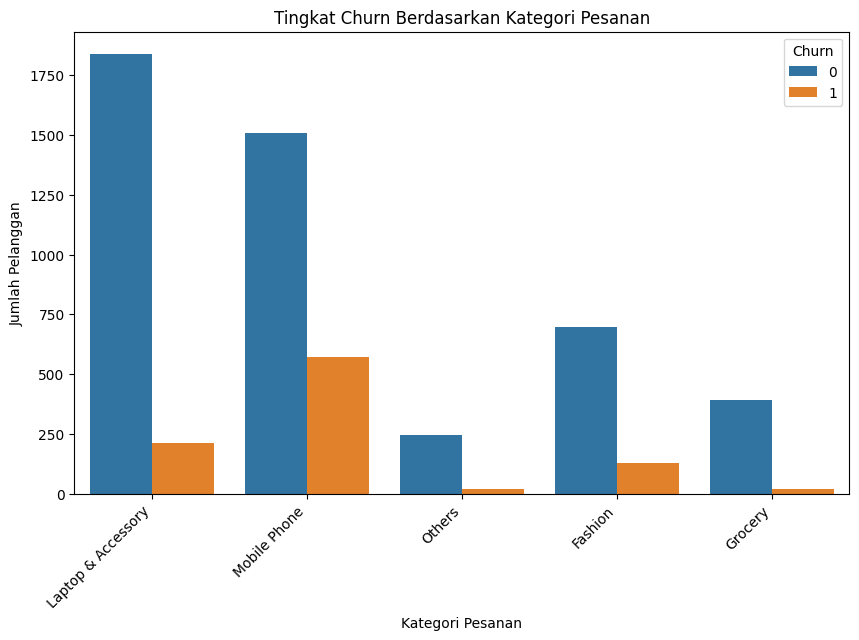

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='PreferedOrderCat', hue='Churn')
plt.title('Tingkat Churn Berdasarkan Kategori Pesanan')
plt.xlabel('Kategori Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.show()

Churn                      0         1
PreferedOrderCat                      
Fashion             0.845036  0.154964
Grocery             0.951220  0.048780
Laptop & Accessory  0.897561  0.102439
Mobile Phone        0.725962  0.274038
Others              0.924242  0.075758


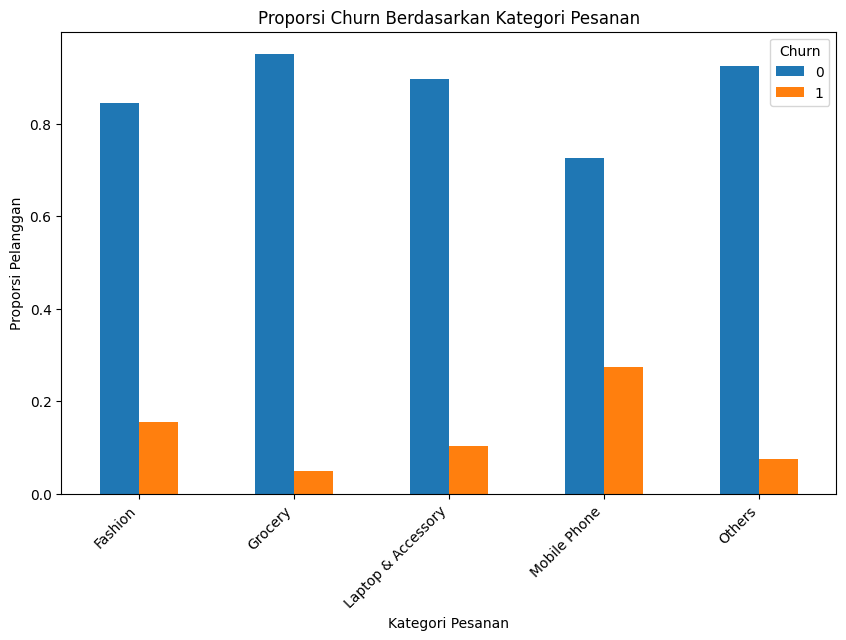

In [162]:

# Analisis Hitungan (Count)
# Melihat jumlah pelanggan yang churn dan tidak churn berdasarkan kategori pesanan
df_count = df_cleaned.groupby('PreferedOrderCat')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print(df_count)

# Visualisasi dengan Bar Chart
# Membuat bar chart untuk membandingkan proporsi churn di setiap kategori
df_count.plot(kind='bar', figsize=(10, 6))
plt.title('Proporsi Churn Berdasarkan Kategori Pesanan')
plt.xlabel('Kategori Pesanan')
plt.ylabel('Proporsi Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [163]:
# Simpan ke file CSV
df_cleaned.to_csv("shopshop_data_cleaned.csv", index=False)